<a href="https://colab.research.google.com/github/1105-Braum-Tristan/Swamp-Cooler-301-Final/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 1 Report**

Richie White

CS458

## **P1-1. Curse of Dimensionality**

**(a) Generate 1000 points following a uniform distribution under a given dimension, and then compute difference between max and min distance between any pair of points. Hint: Refer to the tutorial “Introduction to Numpy and Pandas” on how to generate random points.**

In [1]:
# Codes for P1-1(a)
import numpy as np
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

given_dimension = 10000

#assign random data in increasing dimensions in range
data = np.random.rand(1000,given_dimension)

#pairwise euclidean distance
dist = pdist(data, metric = 'euclidean')

#get the max and min distances in each dimension
maxDist = np.max(dist)
minDist = np.min(dist)

#Difference between max and min points between any two points in a given dimension
diff = maxDist - minDist

print(diff)

2.2582792752293415


**(b) Repeat (a) for different dimensions from 2 to 50.**

In [2]:
# Codes for P2-1(b)
my_range = 2,50

points = np.zeros(my_range[1]-my_range[0])

for i in range(my_range[0], my_range[1]):
    #assign random data in increasing dimensions in range
    data = np.random.rand(1000,i)
    #pairwise euclidean distance
    dist = pdist(data, metric = 'euclidean')
    #get the max and min distances in each dimension
    maxDist = np.max(dist)
    minDist = np.min(dist)
    #Distance between max and min points between any two points
    #Difference between max and min points between any two points in a given dimension
    diff = maxDist - minDist
    #
    points[i-2] = np.log10((diff) / minDist)

Plot log_10(max-min)/min under different number of dimensions.

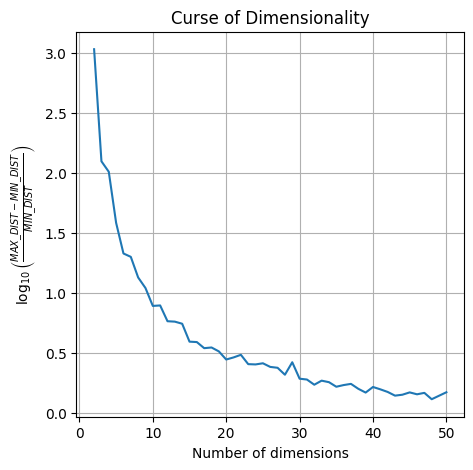

In [3]:
#Plotting log function
#equally spaced indexes for graphing
xpoints = np.linspace(my_range[0],my_range[1], len(points), dtype = int)

#Plot
plt.figure(figsize=(5, 5))
plt.plot(xpoints, points)
plt.title('Curse of Dimensionality')
plt.ylabel(r'$\log_{10}\left(\frac{MAX\_DIST - MIN\_DIST}{MIN\_DIST}\right)$')
plt.xlabel('Number of dimensions')
plt.grid(True)
plt.show()

# **P1-2. The Iris Dataset (https://en.wikipedia.org/wiki/Iris_flower_data_set)**

**(a) Data Visualization. Duplicate the following figure using scatter plot.**

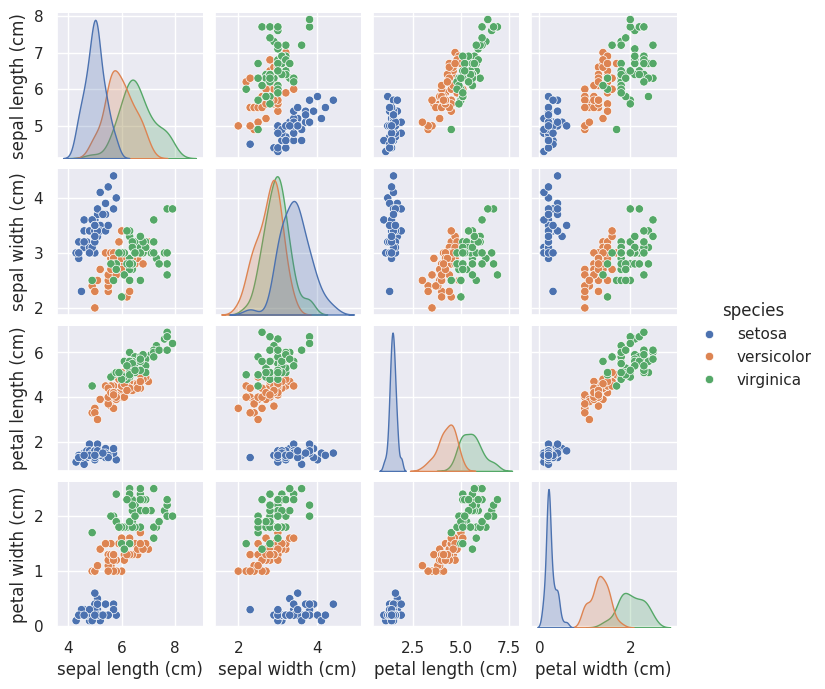

In [4]:
# Codes for P1-2(a)
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
#Bunch object containing iris dataset and metadata
irisBunch = load_iris()
#set default theme for seaborn
sns.set_theme()
#convert bunch object to pandas dataframe
iris_df = pd.DataFrame(irisBunch.data, columns = irisBunch.feature_names)
iris_df['species'] = irisBunch.target_names[irisBunch.target]

#P1-2a

#Plot using seabor
sns.pairplot(iris_df, hue='species',height = 1.75)
plt.show()

**(b) Find the best discretization for the petal length and the petal width that can best separate the Iris data and plot a figure similar to the figure in slide 54 in Chapter 2. For each flower type, list in a table how many data samples are correctly separated and how many are not correctly separated.**

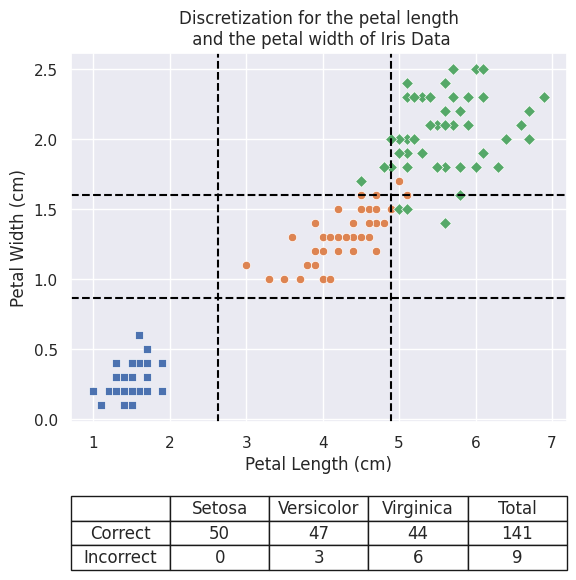

In [5]:
# Codes for P1-2(b)
from sklearn.preprocessing import KBinsDiscretizer
#P1-2b

petalLength = iris_df['petal length (cm)']
petalWidth = iris_df['petal width (cm)']
petalSizes = np.array([petalLength, petalWidth]).T

#Gives shapes to distinguish species
marker = ['s', 'o', 'D']

#gives numeric labels for the
labels = iris_df['species'].replace({'setosa':0, 'versicolor':1, 'virginica':2})

#Plot samples for each flower
for i in range(3):
    sns.scatterplot(x = petalLength[labels == i], y = petalWidth[labels == i], marker = marker[i])

disc  = KBinsDiscretizer( n_bins=3, encode="ordinal", strategy = "quantile")
X_binned = disc.fit_transform(petalSizes)
bin_edges = disc.bin_edges_

#Draw discretition lines
for edge in bin_edges[0][1:-1]:
    plt.axvline(x = edge, color = 'black', linestyle = '--')
for edge in bin_edges[1][1:-1]:
    plt.axhline(y = edge, color = 'black', linestyle = '--')

#Classification boundaries for each flower based on petal lengths and widths
#bin_edges[i][] is 0 for min and 1 for max
#[][i] is what horizontal boundary line it represents ;; 0 is the bottom boundary (bottom line for setosa), 1 is next and so on ;; 3 is the upper line for the virginica
boundaries = [
    np.array([[bin_edges[0][0],bin_edges[1][0]], [bin_edges[0][1],bin_edges[1][1]]]),
    np.array([[bin_edges[0][1],bin_edges[1][1]], [bin_edges[0][2],bin_edges[1][2]]]),
    np.array([[bin_edges[0][2],bin_edges[1][2]], [bin_edges[0][3],bin_edges[1][3]]])

]

#tuple of flower dataframes
flowers = iris_df[iris_df['species'] == 'setosa'], iris_df[iris_df['species'] == 'versicolor'], iris_df[iris_df['species'] == 'virginica']
#counter for correctly binned samples
numCorrect = np.zeros(3).astype(int)
#Number of samples for each flower
numFlowers = np.array([flowers[0].shape[0], flowers[1].shape[0], flowers[2].shape[0]]).astype(int)

#range through the boundaries arrays and checks for max(1) and min (0)
for i in range(len(flowers)):
    minBound = boundaries[i][0]
    maxBound = boundaries[i][1]
    total = ((flowers[i]['petal length (cm)'] >= minBound[0]) & (flowers[i]['petal length (cm)'] <= maxBound[0])) & (flowers[i]['petal width (cm)'] >= minBound[1]) & (flowers[i]['petal width (cm)'] <= maxBound[1])
    numCorrect[i] = np.sum(total)

#Calculate number of incorreclty classified flowers
numIncorrect = numFlowers - numCorrect

#Create Table
tableArr = np.array([[" ", "Setosa", "Versicolor", "Virginica", "Total"],
                    ["Correct", numCorrect[0], numCorrect[1], numCorrect[2], np.sum(numCorrect)],
                    ["Incorrect", numIncorrect[0], numIncorrect[1], numIncorrect[2], np.sum(numIncorrect)],
                    ])

#Label figure
plt.title('Discretization for the petal length\n and the petal width of Iris Data')
plt.ylabel('Petal Width (cm)')
plt.xlabel('Petal Length (cm)')
plt.grid(True)

plt.table(cellText = tableArr, cellLoc = 'center', loc = 'bottom', bbox = [0,-0.4, 1, 0.2])
plt.show()


Discuss your results here.

In part a of the second problem I graphed the relationship of sepal and petal measurements of iris samples. We can see that some relationships are more linearly seperable than others and could be used for classifying the type of flower.
In part b I find the best descretization that seperates the iris data by species using their petal lengths and widgths. To do this, I used the 'sklearn' library 'KbinsDiscretizer' to bin the samples into three categories. The discretization is done on quantiled values so that they're seperated into three bins with equal amounts of samples. This yields a 94% classification accuracy. We want to use a quantiled strategy because our data sampled in three equal parts. Otherwise, we could use a uniform strategy that would create bins with equal widths but this would result in more misclassified samples with a 91% accuracy.

# **P1-3. Principal Component Analysis for The Iris Dataset**

**(a) Use the Iris dataset and plot all the samples in a figure using Sepal Length and Sepal Width, i.e., xlabel('Sepal length') and ylabel('Sepal width').**

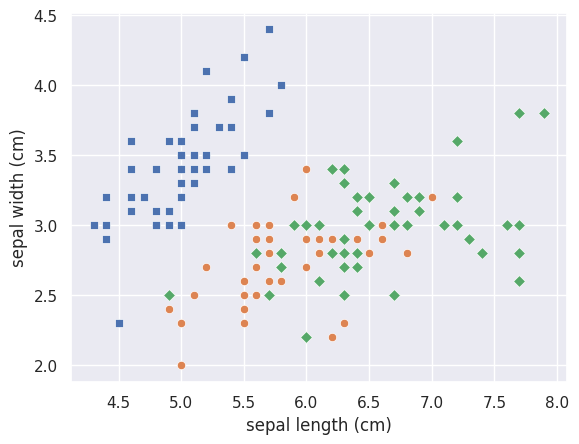

In [6]:
# Codes for P1-3(a)
sepalLength = iris_df['sepal length (cm)']
sepalWidth = iris_df['sepal width (cm)']
sepalSizes = np.array([sepalLength, sepalWidth]).T

#Gives shapes to distinguish species
marker = ['s', 'o', 'D']

#gives numeric labels for the
labels = iris_df['species'].replace({'setosa':0, 'versicolor':1, 'virginica':2})

#Plot samples for each flower
for i in range(3):
    sns.scatterplot(x = sepalLength[labels == i], y = sepalWidth[labels == i], marker = marker[i])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.grid(True)
plt.show()

**(b)The Iris dataset has 4 attributes (sepal length, sepal width, petal length, and petal width). Use PCA to reduce the dimension of the dataset from 4 to 2. Plot all the samples after the dimensionality reduction in a 2D figure. Compare this figure with the figure in (a) and discuss whether you can better separate the data samples after the dimensionality reduction.**

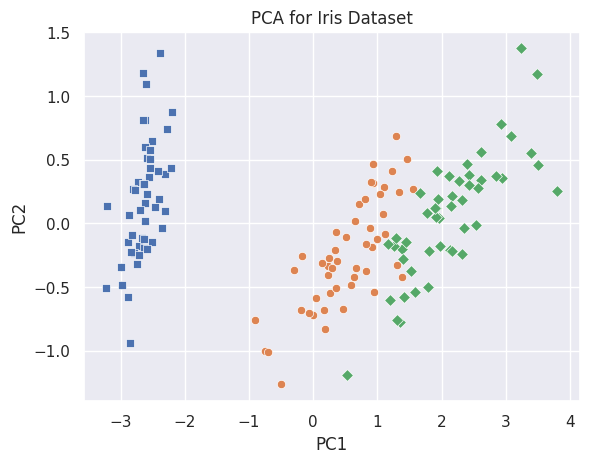

In [7]:
# Codes for P1-3(b)
from sklearn.decomposition import PCA

X = np.array([sepalLength, sepalWidth, petalLength, petalWidth]).T

pca = PCA(n_components = 2)
pca.fit(X)
X_pca = pca.transform(X)

#Plot samples for each flower
for i in range(3):
    sns.scatterplot(x = X_pca[labels == i, 0], y = X_pca[labels == i, 1], marker = marker[i])

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA for Iris Dataset')
plt.grid(True)
plt.show()

Discuss your results here.
In problem 3, we use PCA to perform dimensionality reduction on the iris dataset in order to better seperate the data based on species. In the first part we can see the versicolor and virginica samples could not be linearly seperated when only considering sepal length and width. It is difficult to consider all four measurements in 4 dimensional vector space due to the curse of dimensionality. The data is too sparse to extrapolate any meaningingful seperations. This is why we use PCA, to project the most important information onto 2 principal components. This reduces the number of dimensions so that the species can be more clearly seperated compared to the original 4 dimensions. PCA projects the data onto principal components that represent the directions of greatest variance in the data. Doing this we can represent the most important information while reducing the amount of dimensions. As a result, the iris species were clearly seperated better than before methods in this project.

In [9]:
pip install -U notebook-as-pdf

SyntaxError: invalid syntax (<ipython-input-9-364f75777ac3>, line 1)